<a href="https://colab.research.google.com/github/Sandiihers/Mis_collabs/blob/main/Threshold_Distribution_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [6]:
####################################33
#librerías
from google.colab import drive
drive.mount('/content/drive')
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow
import numpy as np
import time
import imageio
from google.colab.patches import cv2_imshow
%matplotlib inline
###############################
#Definimos las imagenes  que están en el directorio de Drive:
I1='/content/drive/MyDrive/Práctica2_LabContempo1/001_40kV_40mAs.jpg'
I2='/content/drive/MyDrive/Práctica2_LabContempo1/002_43kV_32mAs.jpg'
I3='/content/drive/MyDrive/Práctica2_LabContempo1/003_46kV_21mAs.jpg'
I4='/content/drive/MyDrive/Práctica2_LabContempo1/004_49kV_15mAs.jpg'
I5='/content/drive/MyDrive/Práctica2_LabContempo1/005_52kV_12mAs.jpg' 
#lectura de imagenes
#Leemos las imagenes:
imagen1=cv2.imread(I1)
imagen2=cv2.imread(I2)
imagen3=cv2.imread(I3)
imagen4=cv2.imread(I4)
imagen5=cv2.imread(I5)
#Guardamos en:
Dir_imagenes=[imagen1,imagen2,imagen3,imagen4,imagen5]
###################################################################
#FUNCIÓN PARA QUE CORTE TODAS LAS IMAGENES imagen[yi:yf,xi:xf]
#cv2.bitwise_not invierte las imagenes
#Guardamos cada una de las imagenes de los objetos 
Objeto1=[]
Objeto2=[]
Objeto3=[]
for i in range(len(Dir_imagenes)):
    Objeto1.append(cv2.bitwise_not(Dir_imagenes[i][760 : 1500, 190 : 830]))
    Objeto2.append(cv2.bitwise_not(Dir_imagenes[i][860:1455,1100:1650]))
    Objeto3.append(cv2.bitwise_not(Dir_imagenes[i][790:1480,2120:2620]))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Funciones

In [7]:
#Distribución completa por rango
def distribucion_por_rango(imagen,inicio_dis,fin_dist):
   for i in range (inicio_dis,fin_dist):
     distribution=plt.hist(imagen.ravel(),1,[i,i],alpha=1,color='blue')
    #  #####################################

In [29]:
# #FUNCIÓN PARA MOSTRAR LAS IMAGENES
def animacion(imagen,inicio_dis,fin_dist,namegif):
   frames=[]
   names=[]
   for i in range (inicio_dis,fin_dist):
     ret, threshold = cv2.threshold(imagen,i,255,cv2.THRESH_BINARY)
     frames.append(threshold)
     fig, (ax1, ax2) = plt.subplots(1, 2)
    #  fig.suptitle('Threshold y Distribuciones')
     ax1.imshow(threshold,aspect="auto")
     ax2.hist(imagen.ravel(),fin_dist,[0,fin_dist],color='black',alpha=0.3)
     ax2.hist(imagen.ravel(),1,[i,i],alpha=1,color='black') 
     fig.tight_layout()
     a=str(i)
     fig.savefig(a)
     names.append(a+'.png')
   with imageio.get_writer(namegif+'.gif', mode='I') as writer:
    for filename in names:
        image = imageio.imread(filename)
        writer.append_data(image)
    #  ax2.set_xlim([0,256])

#Función para Threshold y las Distribuciones

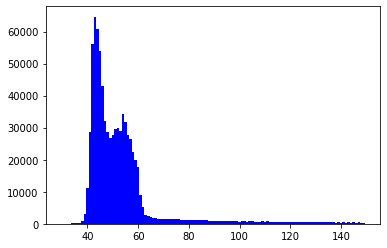

In [30]:
distribucion_por_rango(Objeto1[0],30,150)
# distribucion_por_rango(imagen,incio,final)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


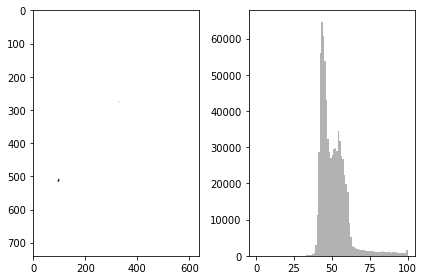

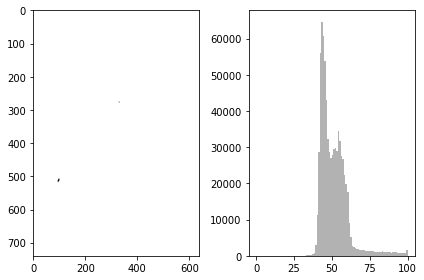

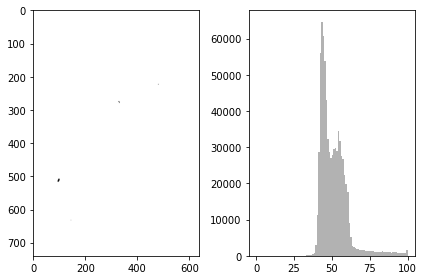

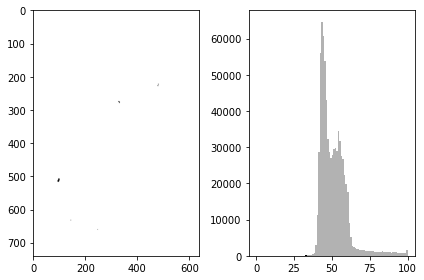

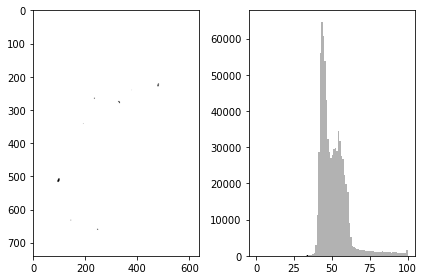

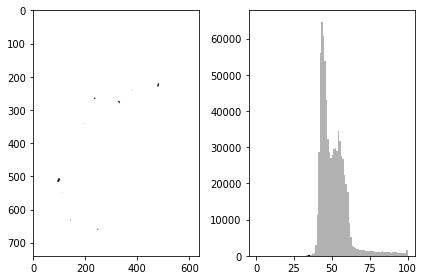

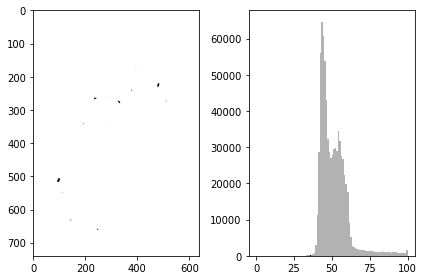

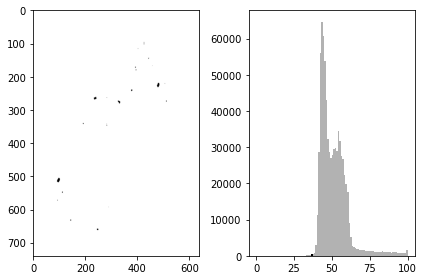

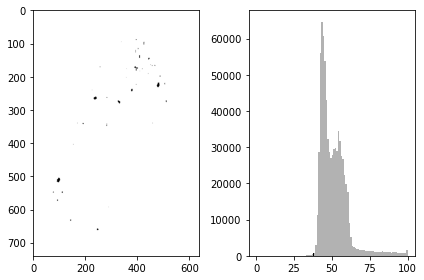

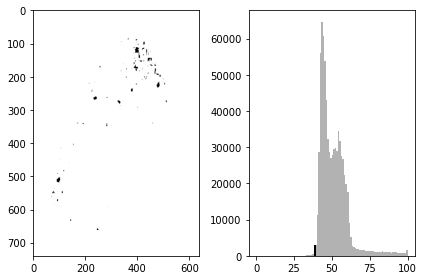

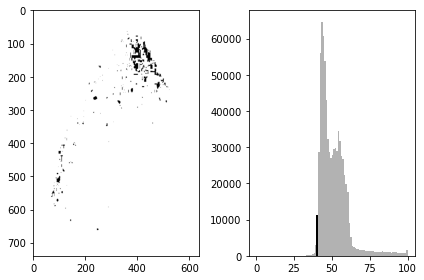

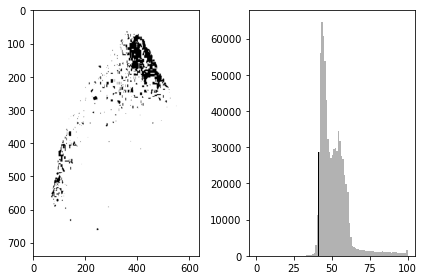

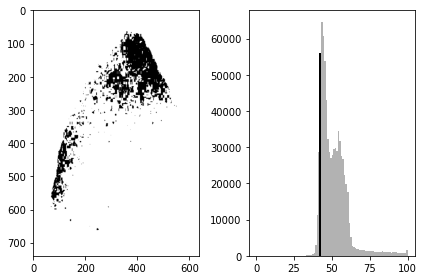

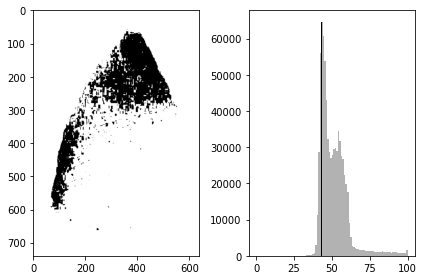

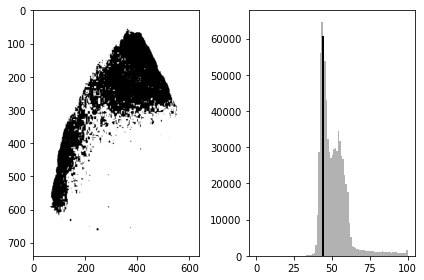

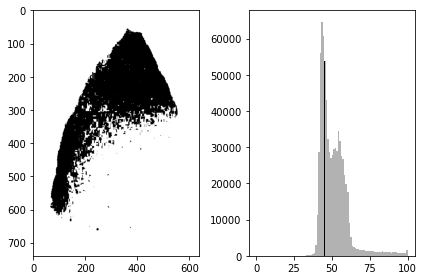

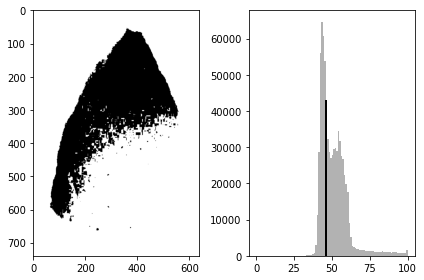

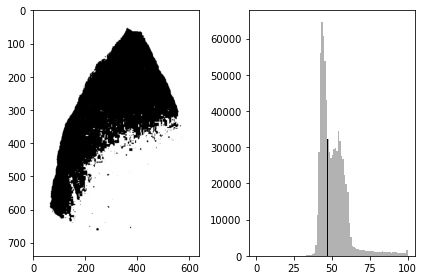

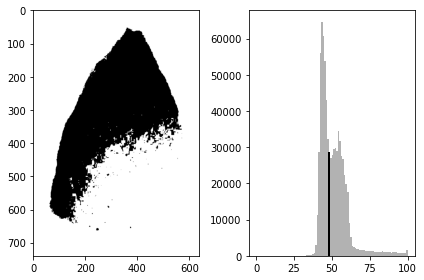

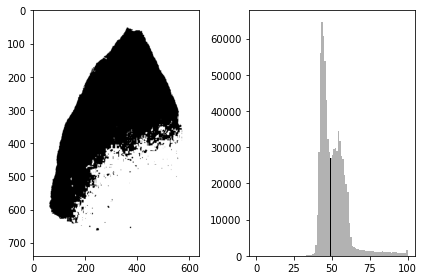

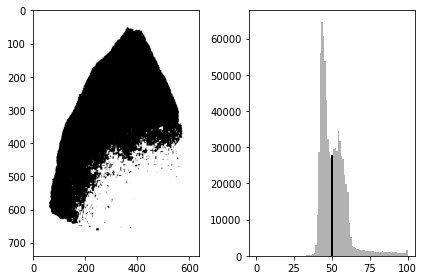

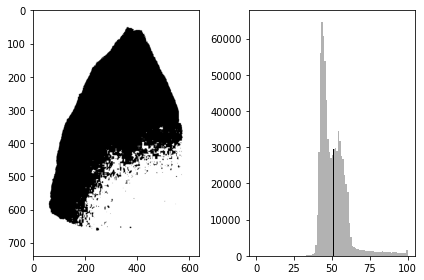

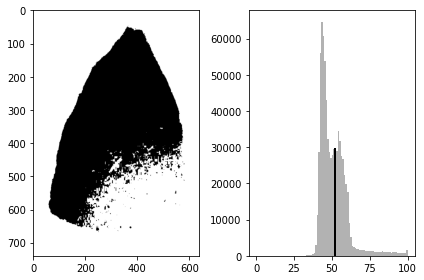

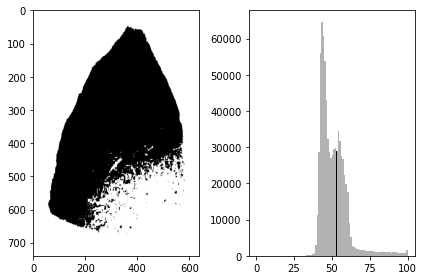

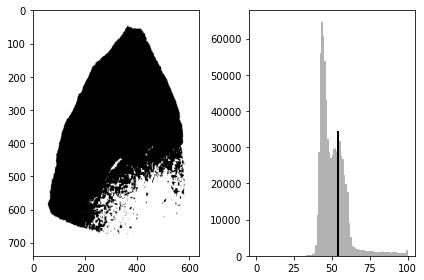

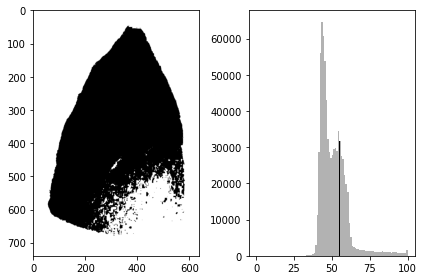

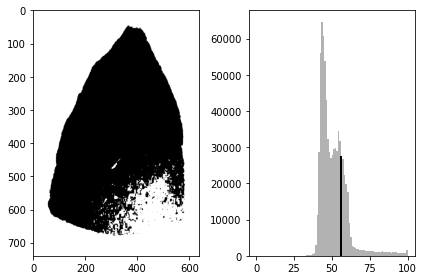

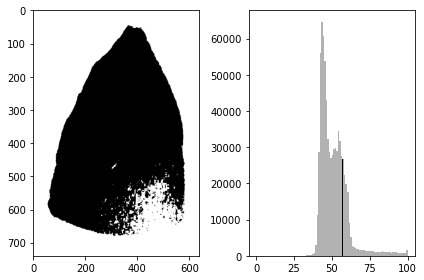

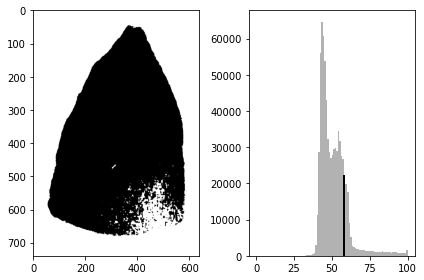

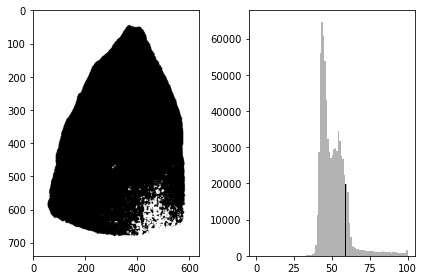

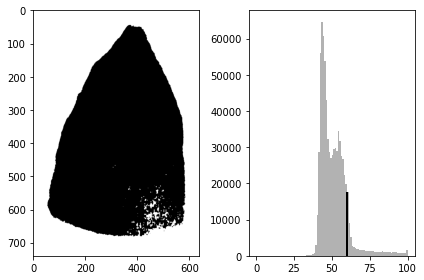

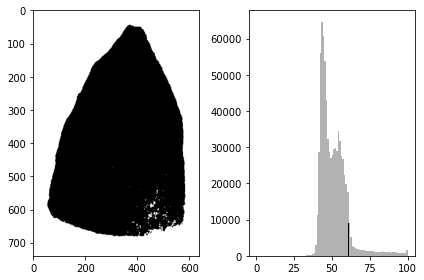

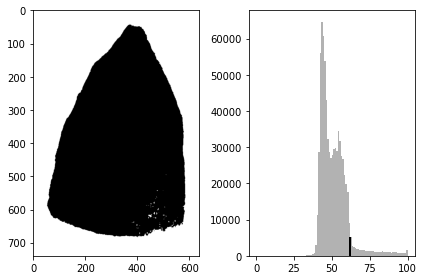

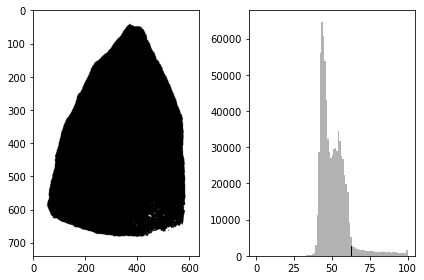

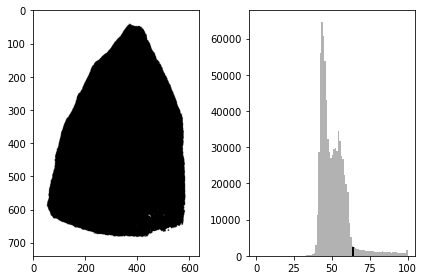

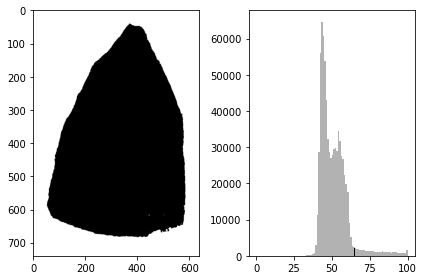

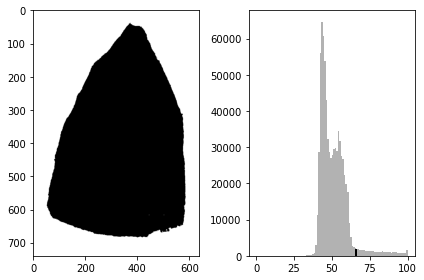

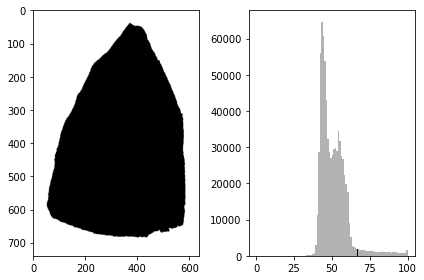

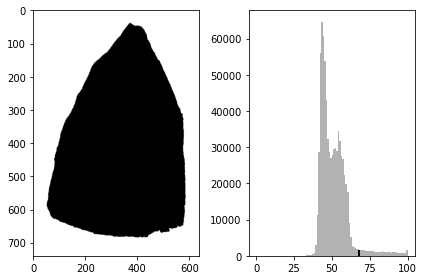

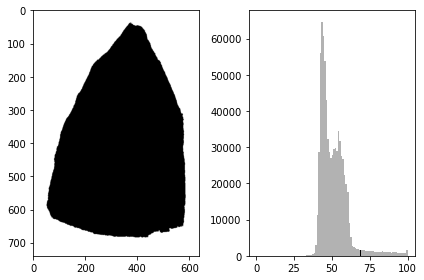

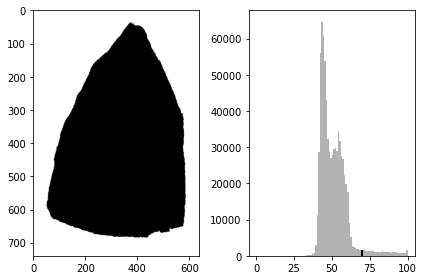

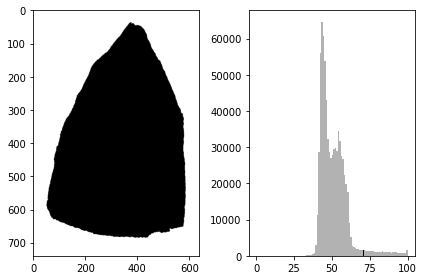

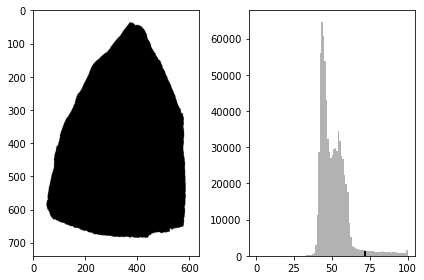

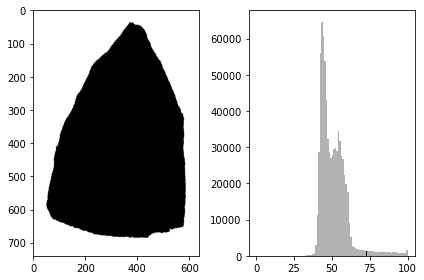

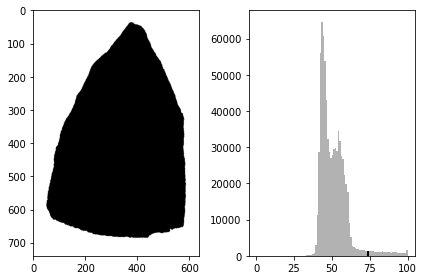

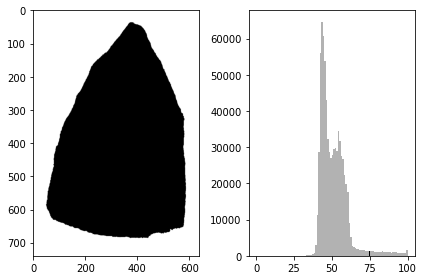

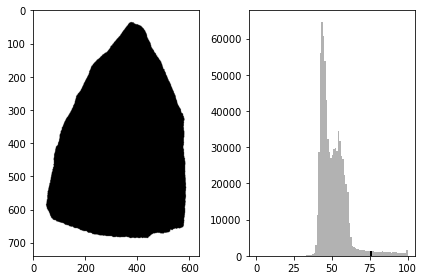

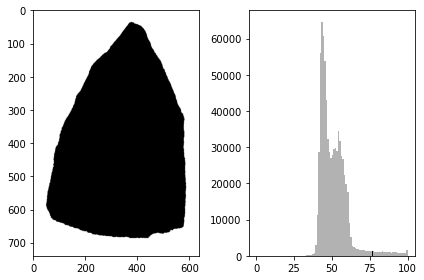

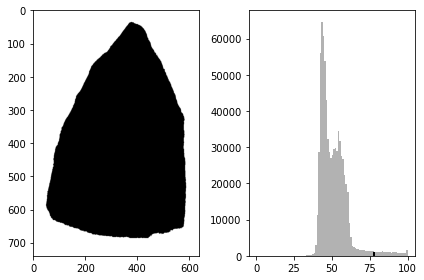

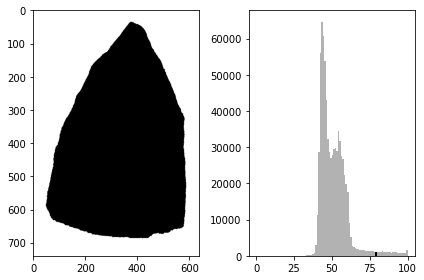

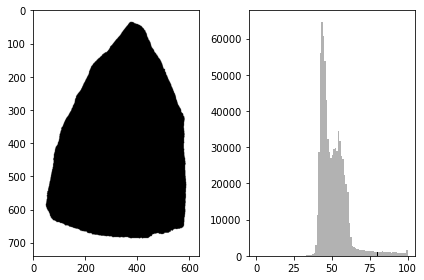

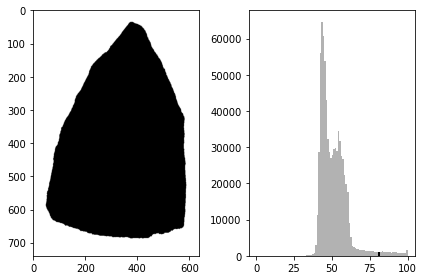

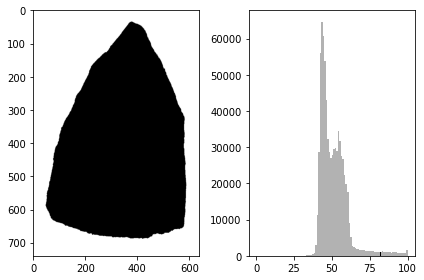

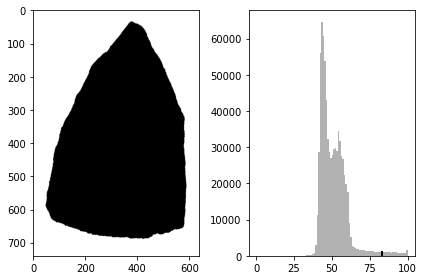

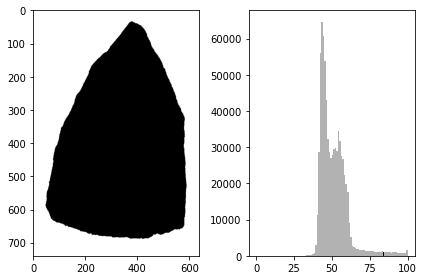

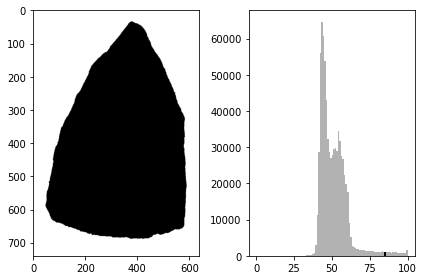

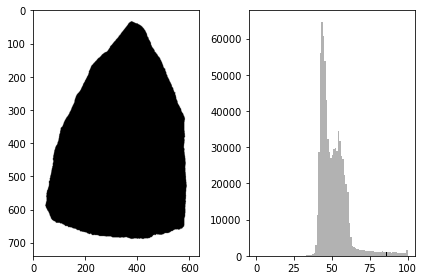

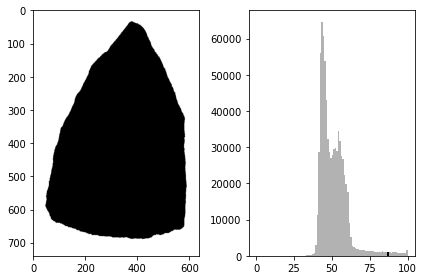

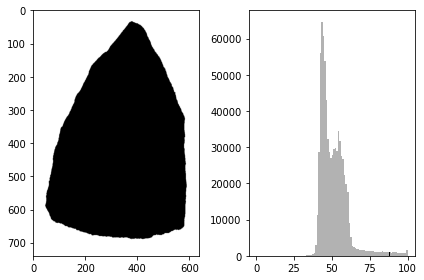

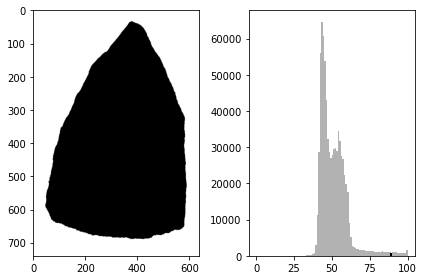

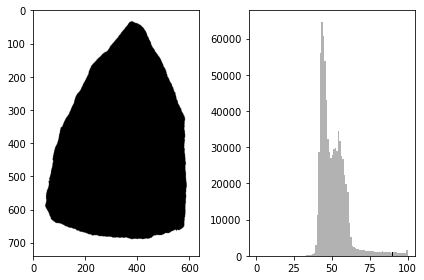

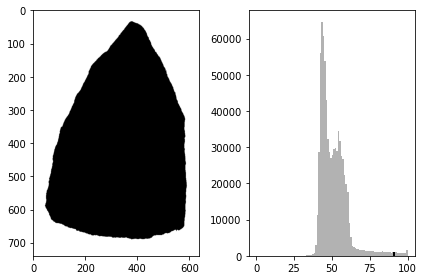

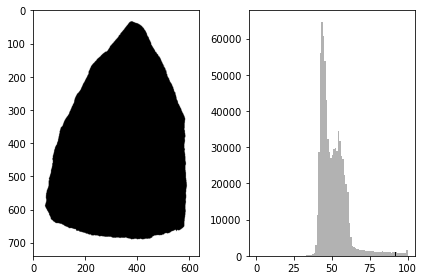

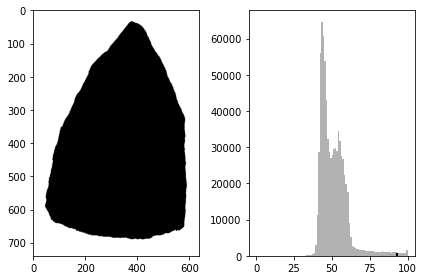

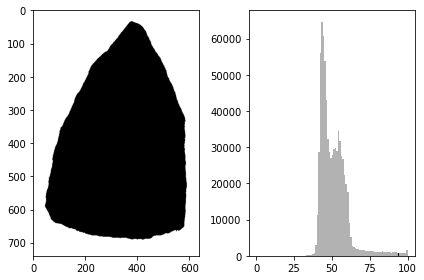

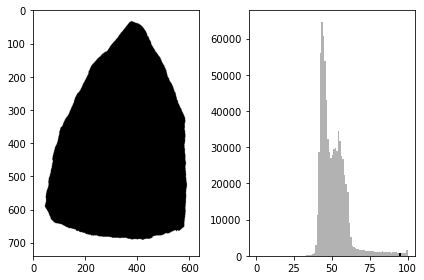

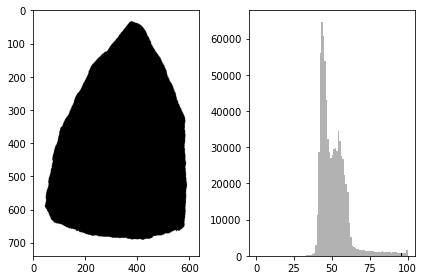

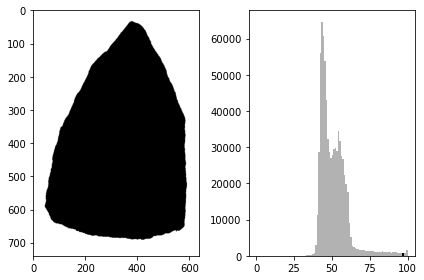

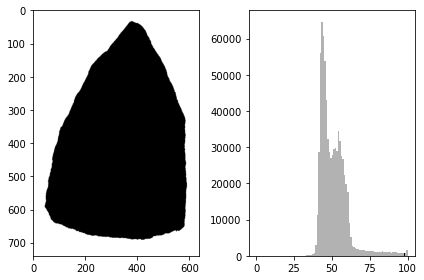

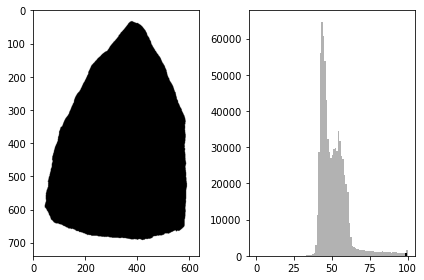

In [32]:
animacion(Objeto1[0],30,100,'Objeto1_001')
#Objeto1[0]=Imagen001 objeto 1
# animacion(imagen,incio,final,nombre del gif)